# Separation A,B

In this notebook we'll compute the separation between two sets of nodes $A$ and $B$ of a same network. We will use the Zacary karate club's network in both `networkx` and `graoh-tool`.

Requirements:
 - `numpy`

Optional:
 - `graph-tool`
 - `networkx`
 
 
We'll create two sets of nodes at random with sizes 2, and 6 respectively (this can be changed), and calculate their separation measure. Wi'll do this many times and time the computation time. In the end, we'll also draw the graph with the two sets $A$ and $B$.

In [1]:
try:
    import graph_tool.all as gt
except ModuleNotFoundError:
    pass

try:
    import networkx as nx
except ModuleNotFoundError:
    pass

import numpy as np
from numpy.random import choice

Let's also import the class `Networkx`

In [2]:
%cd ..

from classes.network import Network

/Users/rdora/proximity


# NetworkX

In [3]:
G = nx.karate_club_graph()

In [4]:
net1 = Network(G)

In [5]:
%%time
for i in range(200):
    A = choice(net1.Graph.nodes, size=2, replace=False)
    B = choice(net1.Graph.nodes, size=6, replace=False)
    net1.S_AB(A, B)

CPU times: user 165 ms, sys: 6.66 ms, total: 172 ms
Wall time: 170 ms


# Graph-tool

In [6]:
g = gt.collection.data['karate']

In [7]:
net2 = Network(g)

In [8]:
%%time
for i in range(200):
    A = choice(net1.Graph.nodes, size=2, replace=False)
    B = choice(net1.Graph.nodes, size=6, replace=False)
    net2.S_AB(A, B)

CPU times: user 1.48 s, sys: 10.6 ms, total: 1.5 s
Wall time: 1.51 s


Let's draw the graph and color the nodes depending if their in set $A$ (orange) or in same $B$ (blue) or in neither (gray). Note that nodes can be in both sets $A$ 

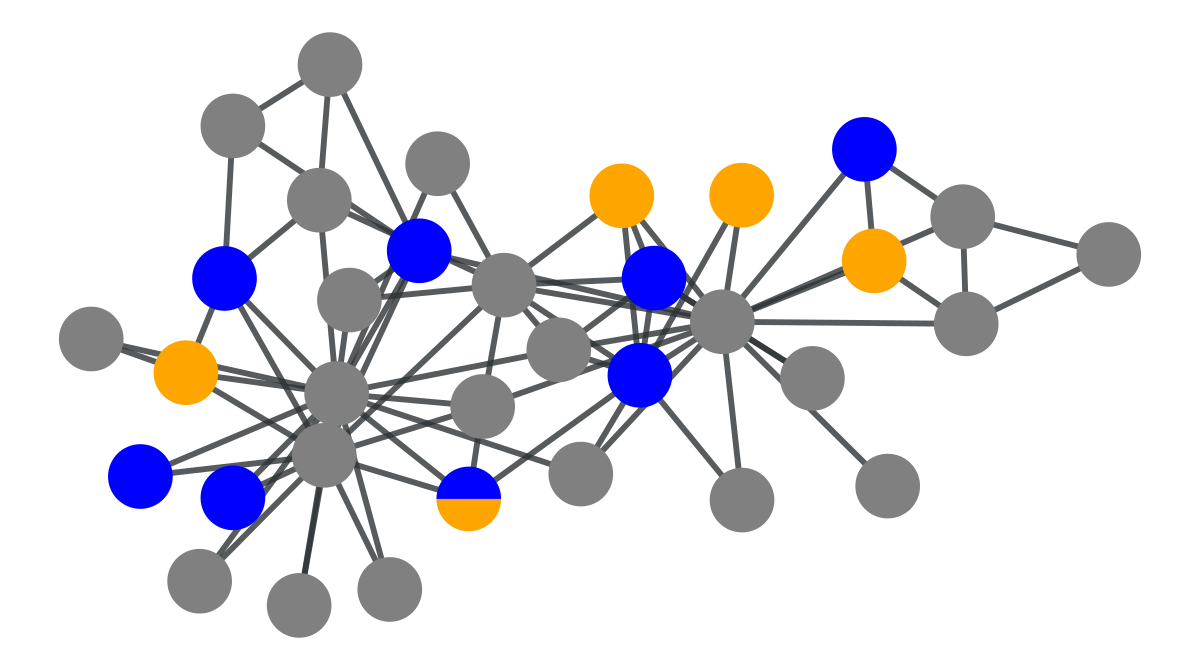

[21  7 29 30  4] [ 1  3 30 15 23 10 31 14] -0.6458333333333333


In [15]:
for i in range(1):
    A = choice(net1.Graph.nodes, size=5, replace=False)
    B = choice(net1.Graph.nodes, size=8, replace=False)
    colors = g.new_vp('vector<string>')
    fractions = g.new_vp('vector<int>')
    for v in g.iter_vertices():
        frac = []
        if v in A:
            frac.append(1)
        else:
            frac.append(0)
        if v in B:
            frac.append(1)
        else:
            frac.append(0)
        if v not in A and v not in B:
            frac.append(1)
        else:
            frac.append(0)
        fractions[v] = frac
        colors[v] = ['orange', 'blue', 'gray']
        
    gt.graph_draw(g, vertex_shape="pie", vertex_pie_fractions=fractions,
                 vertex_pie_colors=colors)
    print(A, B, net2.S_AB(A, B))

In [15]:
A = [21, 7, 29, 30, 4]

In [22]:
B = [1, 3, 30, 15, 23, 10, 31, 14]

In [23]:
total = []
for a in B:
    paths = []
    for b in B:
        if a != b:
            paths.append(nx.shortest_path_length(G, a, b))
    total.append(min(paths))
print(np.mean(total))

1.625


In [30]:
total = []
for a in A:
    paths = []
    for b in B:
        paths.append(nx.shortest_path_length(G, a, b))
    total.append(min(paths))
for b in B:
    if b != 30:
        paths = []
        for a in A:
            paths.append(nx.shortest_path_length(G, a, b))
        total.append(min(paths))
print(np.mean(total))

1.1666666666666667


In [26]:
total

[1, 1, 1, 0, 1]

In [31]:
1.1666666666666667 - (1.625 + 2) / 2

-0.6458333333333333

In [13]:
list(G.neighbors(21))

[0, 1]